In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gaining Insights

In [47]:
data=pd.read_csv('../input/instagram-fake-spammer-genuine-accounts/train.csv')

In [48]:
data.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [49]:
data.isnull().any()

profile pic             False
nums/length username    False
fullname words          False
nums/length fullname    False
name==username          False
description length      False
external URL            False
private                 False
#posts                  False
#followers              False
#follows                False
fake                    False
dtype: bool

In [50]:
data.fillna(np.median(data))

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [51]:
X=data.drop('fake', axis=1)
Y=data['fake']

**Defining a function for hyperparameter tuning**

In [72]:
def print_grid_search_result(grid_search):
    print(grid_search.best_params_)
    
    best_train = grid_search.cv_results_["mean_train_score"][grid_search.best_index_]
    print("best mean_train_score: {:.3f}".format(best_train))
        
    best_test = grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
    print("best mean_test_score: {:.3f}".format(best_test))

**Feature Scaling**

In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

# Data Visualization

<AxesSubplot:>

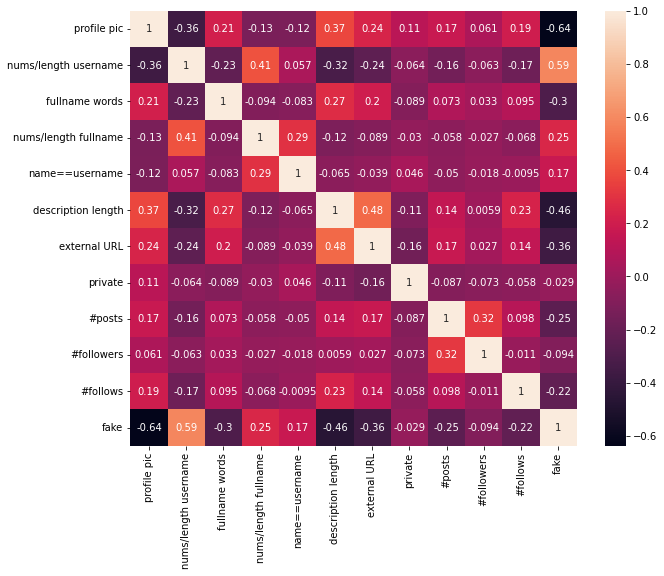

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

# Splittin the data

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1,random_state=42)

# Decision Tree Classifier

In [56]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("--------------------------------------------Training Insights-----------------------------------------------------------")
pred=clf.predict(x_train)
print(classification_report(pred,y_train))
Accuracy= accuracy_score(pred,y_train)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_train))
print("--------------------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------Testing Insights---------------------------------------------------------------")
pred=clf.predict(x_test)
print(classification_report(pred,y_test))
Accuracy= accuracy_score(pred,y_test)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_test))

--------------------------------------------Training Insights-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       258
           1       1.00      1.00      1.00       260

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518

------------------      Accuracy      --------- = 1.0
CONFUSION MATRIX
[[258   0]
 [  0 260]]
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------Testing Insights---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.78      0.85        36
           1       0.71      0.91      0.80        22

    accuracy                           0.83    

**Decision Tree classifier is overfitting the data too much**

# Searching for Best Hyperparameters

In [75]:
from sklearn.model_selection import GridSearchCV
import os
model =RandomForestClassifier(random_state=55)

parameters = {'n_estimators': [300, 500, 700, 1000],
              'max_depth': [7, 9, 11, 13]}
grid1 = GridSearchCV(model, parameters, cv=7, scoring='average_precision',return_train_score=True)
grid1.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [7, 9, 11, 13],
                         'n_estimators': [300, 500, 700, 1000]},
             return_train_score=True, scoring='average_precision')

In [76]:
print_grid_search_result(grid1)

{'max_depth': 9, 'n_estimators': 1000}
best mean_train_score: 1.000
best mean_test_score: 0.982


# RandomForestClassifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth= 9, n_estimators= 1000)
clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, n_estimators=1000)

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("--------------------------------------------Training Insights-----------------------------------------------------------")
pred=clf.predict(x_train)
print(classification_report(pred,y_train))
Accuracy= accuracy_score(pred,y_train)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_train))
print("--------------------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------Testing Insights---------------------------------------------------------------")
pred=clf.predict(x_test)
print(classification_report(pred,y_test))
Accuracy= accuracy_score(pred,y_test)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_test))

--------------------------------------------Training Insights-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       259

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518

------------------      Accuracy      --------- = 0.9980694980694981
CONFUSION MATRIX
[[258   1]
 [  0 259]]
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------Testing Insights---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.82      0.96      0.88        24

    accuracy                    

****RandomForestClassifier performs slightly better than the Decision ****

# Searching for best hyperparameters

In [67]:
from sklearn.model_selection import GridSearchCV
import os


model = GradientBoostingClassifier(max_depth=5, random_state=56)

parameters = {'n_estimators': [50, 100, 200],
              'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}


grid1 = GridSearchCV(model, parameters, cv=7, scoring='average_precision',return_train_score=True)
grid1.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=GradientBoostingClassifier(random_state=55),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='average_precision')

In [68]:
print_grid_search_result(grid1)

{'learning_rate': 0.1, 'n_estimators': 100}
best mean_train_score: 1.000
best mean_test_score: 0.982


# GradientBoostingClassifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
clf==GradientBoostingClassifier(max_depth=5, random_state=56)
clf.fit(x_train,y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
print("--------------------------------------------Training Insights-----------------------------------------------------------")
pred=clf.predict(x_train)
print(classification_report(pred,y_train))
Accuracy= accuracy_score(pred,y_train)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_train))
print("--------------------------------------------------------------------------------------------------------------------------")
print("--------------------------------------------Testing Insights---------------------------------------------------------------")
pred=clf.predict(x_test)
print(classification_report(pred,y_test))
Accuracy= accuracy_score(pred,y_test)
print("------------------      Accuracy      --------- =",Accuracy)
print("CONFUSION MATRIX")
print(confusion_matrix(pred,y_test))

--------------------------------------------Training Insights-----------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       259
           1       1.00      1.00      1.00       259

    accuracy                           1.00       518
   macro avg       1.00      1.00      1.00       518
weighted avg       1.00      1.00      1.00       518

------------------      Accuracy      --------- = 0.9980694980694981
CONFUSION MATRIX
[[258   1]
 [  0 259]]
--------------------------------------------------------------------------------------------------------------------------
--------------------------------------------Testing Insights---------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.85      0.91        34
           1       0.82      0.96      0.88        24

    accuracy                    

# Making Prediction

In [84]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth= 9, n_estimators= 1000)
clf.fit(x_train,y_train)
user_input=(0,0.12,1,0.0,0,0,0,1,0,31,213
)
#changing the user_input to numpy array
userInputArray=np.asarray(user_input)
#reshaping the numpy array
userInputReshaped=userInputArray.reshape(1,-1)
prediction=clf.predict(userInputReshaped)

if(prediction[0]==1):
  print("This instagram Account is a Fake ID")
else:
  print("This instagram Account is Genuine")
print(prediction)

This instagram Account is Genuine
[0]


# Our model predicts with an accuracy of 90% on validation data